In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


task1

In [2]:
diabet_df = pd.read_csv('diabetes.csv')
diabet_df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [13]:
diabet_df.shape

(4303, 18)

In [14]:
print(diabet_df.isnull().sum())

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


In [15]:
train_df, test_df = train_test_split(diabet_df, test_size=0.2, random_state=42)
train_df.shape, test_df.shape
X_train = train_df[['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']]
y_train = train_df['Diabetes']
X_test = test_df[['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']]
y_test = test_df['Diabetes']

task2

In [17]:
ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)

In [18]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [19]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=0.1
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

task 3

In [20]:
def evaluate_model(model_name, y_test, y_preds):
    mse = mean_squared_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    print(f"{model_name}:")
    print(f"  - Mean Squared Error: {mse:.4f}")
    print(f"  - R2 Score: {r2:.4f}")
    print()

evaluate_model("AdaBoost", y_test, ada_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

AdaBoost:
  - Mean Squared Error: 0.0467
  - R2 Score: 0.7661

Gradient Boosting:
  - Mean Squared Error: 0.0436
  - R2 Score: 0.7815

XGBoost:
  - Mean Squared Error: 0.0436
  - R2 Score: 0.7817



In [21]:
def plot_learning_curve(model_name, train_errors, test_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label="Train MSE", color="blue")
    plt.plot(test_errors, label="Test MSE", color="red")
    plt.title(f"{model_name} Learning Curve (MSE)")
    plt.xlabel("Number of Estimators")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend()
    plt.grid()
    plt.show()

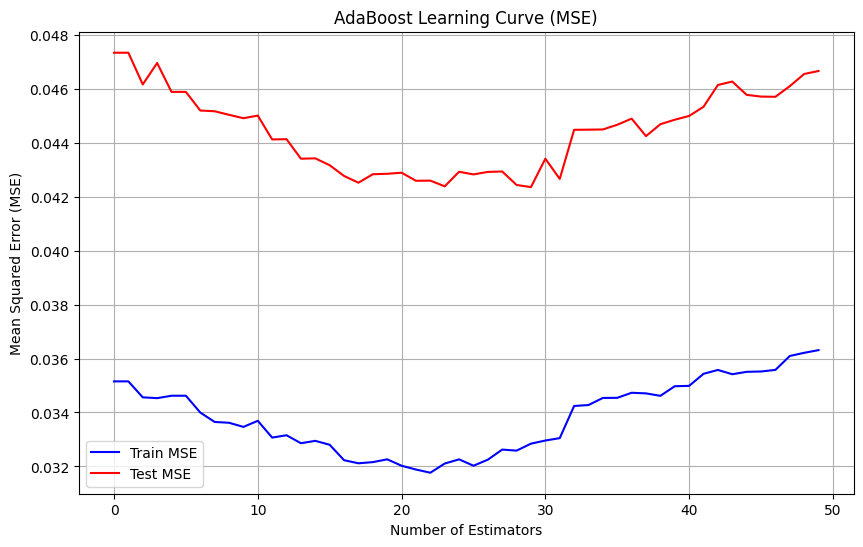

In [22]:
ada_train_errors, ada_test_errors = [], []
for n in range(1, 51):  # Ітерації від 1 до 50
    ada_model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3),
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    ada_model.fit(X_train, y_train)
    ada_train_errors.append(mean_squared_error(y_train, ada_model.predict(X_train)))
    ada_test_errors.append(mean_squared_error(y_test, ada_model.predict(X_test)))

plot_learning_curve("AdaBoost", ada_train_errors, ada_test_errors)

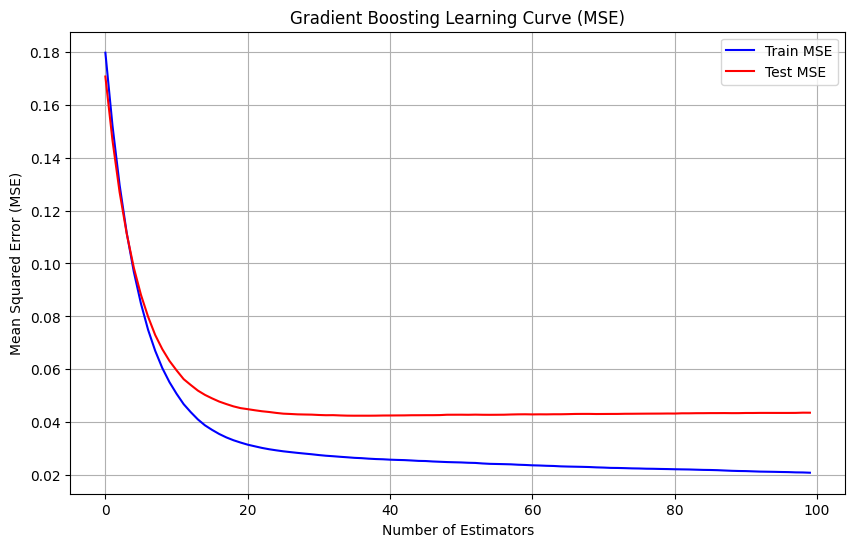

In [23]:
gb_train_errors, gb_test_errors = [], []
for n in range(1, 101):  # Ітерації від 1 до 100
    gb_model = GradientBoostingRegressor(
        n_estimators=n,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gb_model.fit(X_train, y_train)
    gb_train_errors.append(mean_squared_error(y_train, gb_model.predict(X_train)))
    gb_test_errors.append(mean_squared_error(y_test, gb_model.predict(X_test)))

plot_learning_curve("Gradient Boosting", gb_train_errors, gb_test_errors)

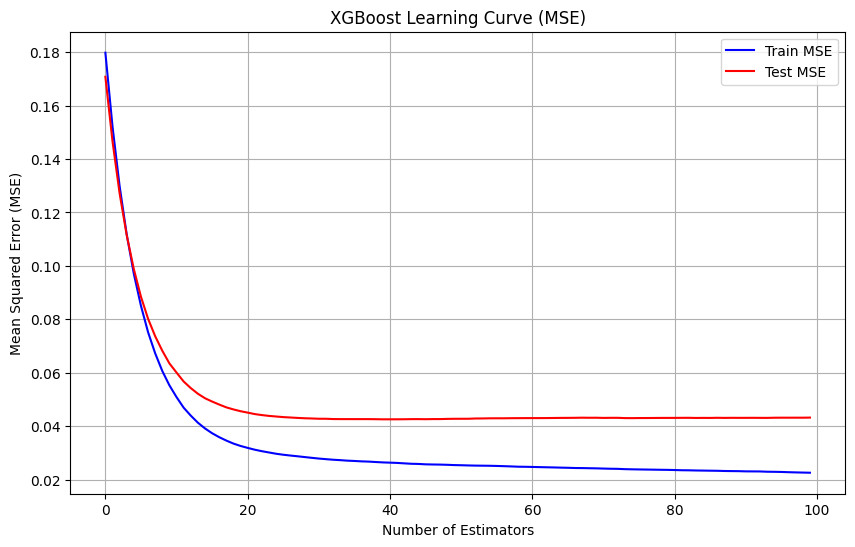

In [24]:
xgb_train_errors, xgb_test_errors = [], []
for n in range(1, 101):  # Ітерації від 1 до 100
    xgb_model = XGBRegressor(
        n_estimators=n,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    xgb_train_errors.append(mean_squared_error(y_train, xgb_model.predict(X_train)))
    xgb_test_errors.append(mean_squared_error(y_test, xgb_model.predict(X_test)))

plot_learning_curve("XGBoost", xgb_train_errors, xgb_test_errors)

task4

In [25]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)
ada_grid = GridSearchCV(estimator=ada_model, param_grid=ada_param_grid, cv=5, scoring='neg_mean_squared_error')
ada_grid.fit(X_train, y_train)

print("Best parameters for AdaBoost:", ada_grid.best_params_)
print("Best CV score for AdaBoost:", -ada_grid.best_score_)

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 100}
Best CV score for AdaBoost: 0.035332851675587376


In [26]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best CV score for Gradient Boosting:", -gb_grid.best_score_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV score for Gradient Boosting: 0.03171471570633246


In [27]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best CV score for XGBoost:", -xgb_grid.best_score_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best CV score for XGBoost: 0.03158828692497337


task6

               Model       MSE       MAE        R2
0           AdaBoost  0.045317  0.098475  0.772839
1  Gradient Boosting  0.043582  0.082424  0.781536
2            XGBoost  0.043179  0.081974  0.783556


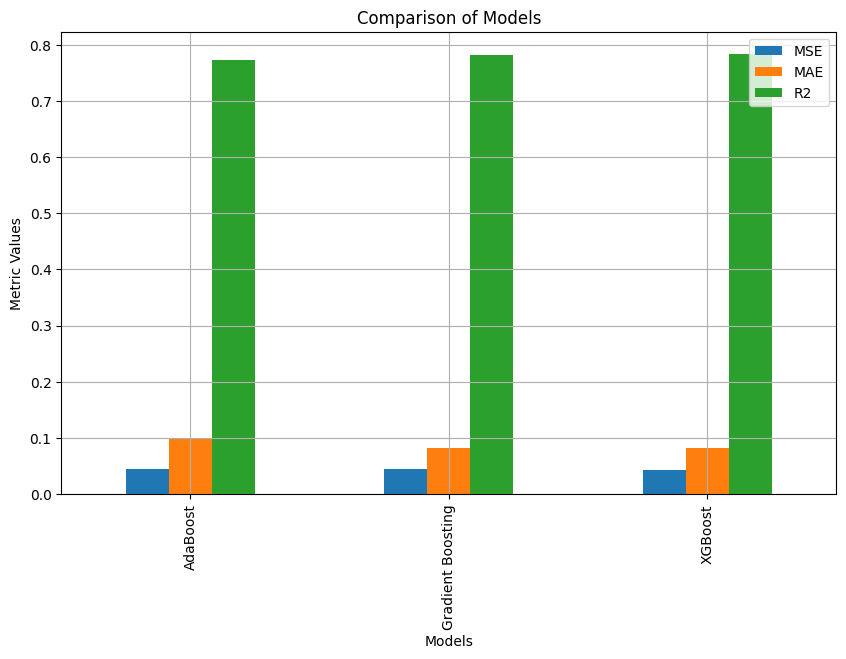

In [30]:
models = {
    "AdaBoost": ada_grid.best_estimator_,
    "Gradient Boosting": gb_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_
}

results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index("Model").plot(kind="bar", figsize=(10, 6), grid=True)
plt.title("Comparison of Models")
plt.ylabel("Metric Values")
plt.xlabel("Models")
plt.legend(loc="upper right")
plt.show()

Регуляризація в XGBoost дала найкращі результати, допомігши збалансувати складність моделі і запобігти перенавчанню. Gradient Boosting і AdaBoost залишаються конкурентними, але їх регуляризація виявилась менш ефективною для цього набору даних. Регуляція погіршує модель, коли модель недонавчена через занадто сильну регуляризацію (великі значення reg_alpha або reg_lambda), що не дозволяє повністю відобразити закономірності у даних.

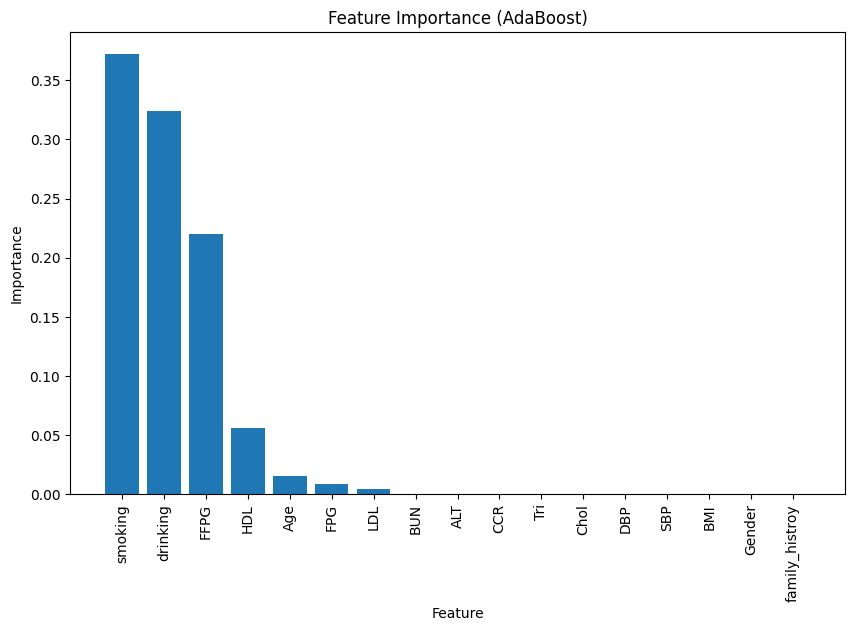

In [34]:
importances = ada_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (AdaBoost)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

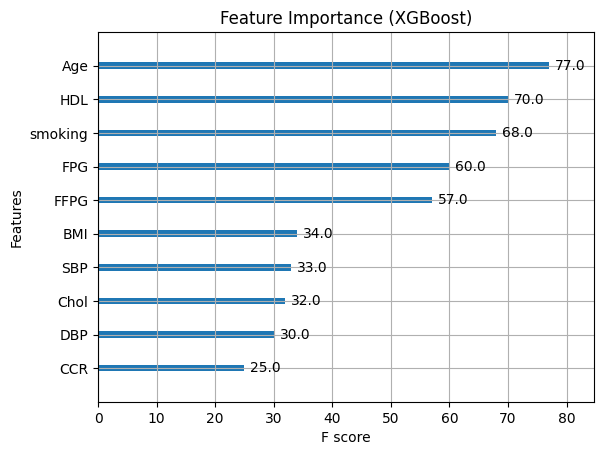

In [31]:
xgb.plot_importance(xgb_grid.best_estimator_, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

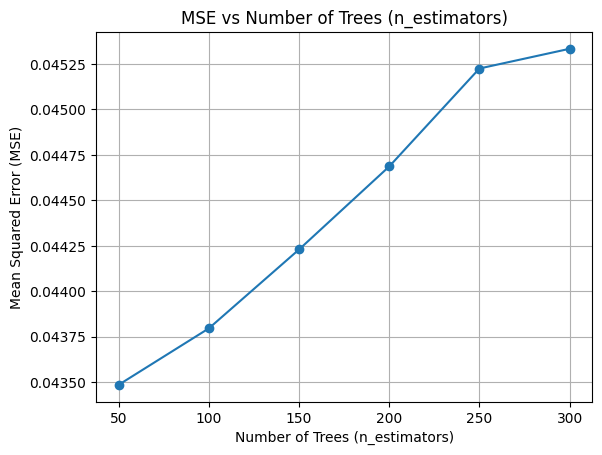

In [35]:
n_estimators_range = np.arange(50, 301, 50)
mse_scores = []

for n in n_estimators_range:
    model = xgb.XGBRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.plot(n_estimators_range, mse_scores, label="XGBoost", marker='o')
plt.title("MSE vs Number of Trees (n_estimators)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

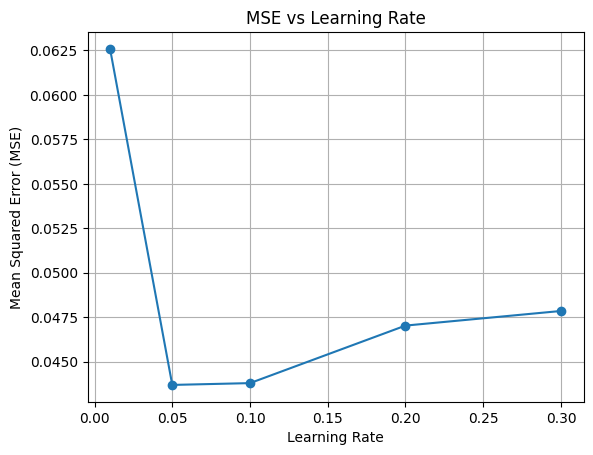

In [36]:
learning_rate_range = [0.01, 0.05, 0.1, 0.2, 0.3]
mse_scores_lr = []

for lr in learning_rate_range:
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores_lr.append(mean_squared_error(y_test, y_pred))

plt.plot(learning_rate_range, mse_scores_lr, label="XGBoost", marker='o')
plt.title("MSE vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

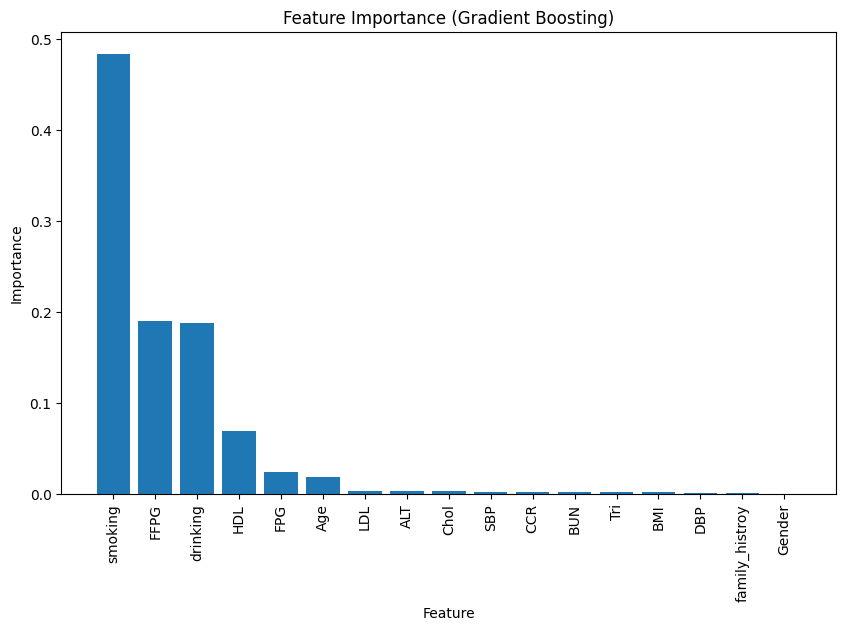

In [33]:
feature_importance = gb_grid.best_estimator_.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


task7

Найкращою моделлю є XGBoost, оскільки вона дала найкращі результати за MSE, MAE і R². Регуляризація в XGBoost (L1 та L2) допомогла знизити перенавчання і покращила узагальненість моделі.

Як регуляризація вплинула:

У XGBoost регуляризація зменшила перенавчання, що дозволило покращити результати.
У Gradient Boosting регуляризація обмежила модель, не давши їй повністю адаптуватися до даних.
AdaBoost не має такої гнучкості, що обмежує її ефективність.
Рекомендації для покращення:

Для XGBoost можна ще оптимізувати параметри регуляризації та дерева.
Для Gradient Boosting — збільшити глибину дерев і кількість дерев.
Для AdaBoost — підвищити кількість базових моделей.